In [ ]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

from scipy import stats

warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

## 1. Chimpanzees

In [ ]:
d = pd.read_csv('./data/chimpanzees.csv', header=0, sep=';')
d.shape

(504, 8)

In [ ]:
d.head()

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1


In [ ]:
d.isna().sum()

actor             0
recipient       252
condition         0
block             0
trial             0
prosoc_left       0
chose_prosoc      0
pulled_left       0
dtype: int64

In [ ]:
d["treatment"] = d.prosoc_left + 2 * d.condition
d[["actor", "prosoc_left", "condition", "treatment"]]

,actor,prosoc_left,condition,treatment
0,1,0,0,0
1,1,0,0,0
2,1,1,0,1
3,1,0,0,0
4,1,1,0,1
...,...,...,...,...
499,7,1,1,3
500,7,1,1,3
501,7,0,1,2
502,7,0,1,2


In [ ]:
d.head()

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left,treatment
0,1,NaN,0,1,2,0,1,0,0
1,1,NaN,0,1,4,0,0,1,0
2,1,NaN,0,1,6,1,0,0,1
3,1,NaN,0,1,8,0,1,0,0
4,1,NaN,0,1,10,1,1,1,1


In [ ]:
with pm.Model() as m11_1:
    # Prior
    a = pm.Normal("a", 0.0, 10.0)
    p = pm.Deterministic("p", pm.math.invlogit(a))
    
    pulled_left = pm.Binomial("pulled_left", n=1, p=p, 
                              observed=d.pulled_left)
    
    prior_m11_1 = pm.sample_prior_predictive()
    trace_m11_1 = pm.sample()
    
idata_11_1 = az.from_pymc3(prior=prior_m11_1)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
with pm.Model() as m11_2:
    # Prior
    a = pm.Normal("a", 0.0, 1.5)
    p = pm.Deterministic("p", pm.math.invlogit(a))
    
    pulled_left = pm.Binomial("pul1led_left", 1, p, 
                              observed=d.pulled_left)
    
    prior_m11_2 = pm.sample_prior_predictive()
    trace_m11_2 = pm.sample()
    
idata_11_2 = az.from_pymc3(prior=prior_m11_2)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
idata_11_1.prior

<xarray.Dataset>
Dimensions:            (chain: 1, draw: 500, pulled_left_dim_0: 504)
Coordinates:
  * chain              (chain) int64 0
  * draw               (draw) int64 0 1 2 3 4 5 6 ... 494 495 496 497 498 499
  * pulled_left_dim_0  (pulled_left_dim_0) int64 0 1 2 3 4 ... 500 501 502 503
Data variables:
    pulled_left        (chain, draw, pulled_left_dim_0) int64 1 1 1 1 ... 0 0 0
    a                  (chain, draw) float64 17.85 -1.742 ... 0.577 -17.59
    p                  (chain, draw) float64 1.0 0.1491 ... 0.6404 2.289e-08
Attributes:
    created_at:                 2022-01-14T06:51:42.400645
    arviz_version:              0.8.3
    inference_library:          pymc3
    inference_library_version:  3.9.0

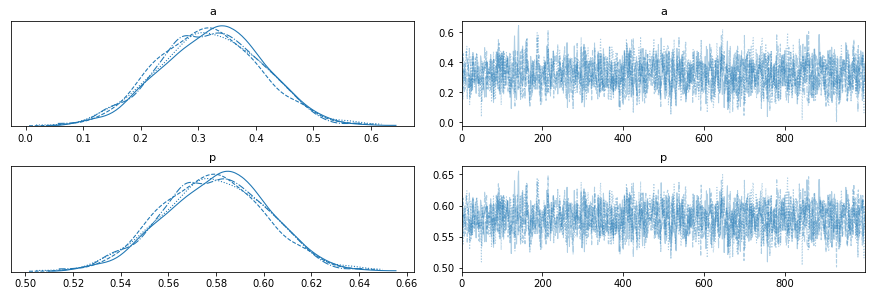

In [ ]:
pm.traceplot(trace_m11_1);

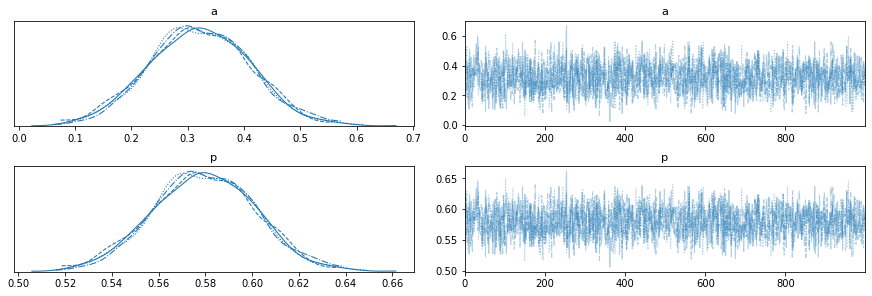

In [ ]:
pm.traceplot(trace_m11_2);

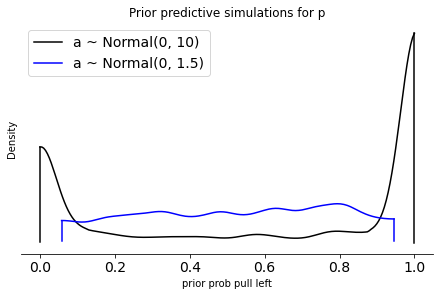

In [ ]:
ax = az.plot_density(
    [idata_11_1, idata_11_2],
    data_labels=["a ~ Normal(0, 10)", "a ~ Normal(0, 1.5)"],
    group="prior",
    colors=["k", "b"],
    var_names=["p"],
    point_estimate=None,
)
ax[0].set_xlabel("prior prob pull left")
ax[0].set_ylabel("Density")
ax[0].set_title("Prior predictive simulations for p");

### Add slope for treatment

In [ ]:
with pm.Model() as m11_3:
    a = pm.Normal("a", 0.0, 1.5)
    b = pm.Normal("b", 0.0, 10.0, shape=4)
    
    p = pm.math.invlogit(a + b[d.treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, 
                              observed=d.pulled_left)
    
    prior_11_3 = pm.sample_prior_predictive()
    trace_11_3 = pm.sample()
    
idata_11_3 = az.from_pymc3(prior=prior_11_3)
prior_3 = idata_11_3.prior

with pm.Model() as m11_4:
    a = pm.Normal("a", 0.0, 1.5)
    b = pm.Normal("b", 0.0, 0.5, shape=4)
    
    p = pm.math.invlogit(a + b[d.treatment])
    pulled_left = pm.Binomial("pulled_left", n=1, p=p, 
                              observed=d.pulled_left)
    
    prior_11_4 = pm.sample_prior_predictive()
    trace_11_4 = pm.sample()
    
idata_11_4 = az.from_pymc3(prior=prior_11_4)
prior_4 = idata_11_4.prior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.8859732462416963, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7174654627767245, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The acceptance probability does not match the target. It is 0.8833198518552058, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


### Actor and treatment

In [ ]:
actor_idx, actors = pd.factorize(d.actor)
treat_idx, treatments = pd.factorize(d.treatment)

In [ ]:
len(actors)

7

In [ ]:
with pm.Model() as m11_5:
    a = pm.Normal("a", 0.0, 1.5, shape=len(actors))
    b = pm.Normal("b", 0.0, 0.5, shape=len(treatments))
    
    actor_id = pm.intX(pm.Data("actor_id", actor_idx))
    treat_id = pm.intX(pm.Data("treat_id", treat_idx))
    p = pm.Deterministic("p", pm.math.invlogit(a[actor_id] + b[treat_id]))
    
    pulled_left = pm.Binomial("pulled_left", n=1, p=p, 
                              observed=d.pulled_left)
    
    trace_11_5 = pm.sample()
    
idata_11_5 = az.from_pymc3(trace_11_4)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [ ]:
az.summary(idata_11_5, var_names=["a", "b"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.310,0.262,-0.175,0.811,0.009,0.007,835.0,802.0,839.0,1037.0,1.0
b[0],-0.105,0.288,-0.679,0.406,0.009,0.006,1032.0,1032.0,1030.0,1488.0,1.0
b[1],0.308,0.293,-0.261,0.839,0.009,0.006,1069.0,1069.0,1070.0,1390.0,1.0
b[2],-0.361,0.288,-0.888,0.198,0.009,0.006,991.0,991.0,995.0,1382.0,1.0
b[3],0.220,0.288,-0.300,0.759,0.009,0.006,1004.0,1004.0,1006.0,1554.0,1.0


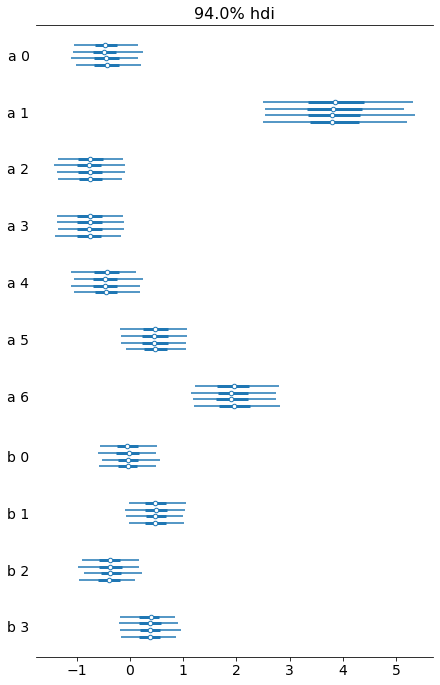

In [ ]:
pm.forestplot(trace_11_5, var_names=["a", "b"]);

In [ ]:
from scipy.special import expit as logistic
from scipy.special import softmax

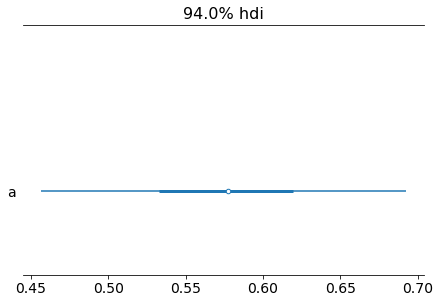

In [ ]:
az.plot_forest(idata_11_5, var_names=["a"], 
               transform=logistic, combined=True);

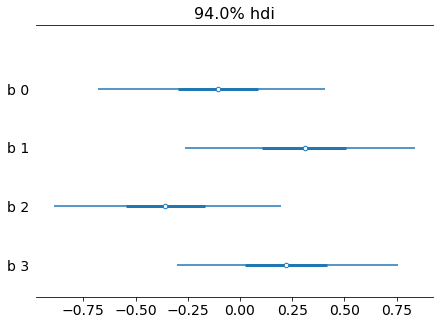

In [ ]:
az.plot_forest(idata_11_5, var_names=["b"], 
               combined=True);

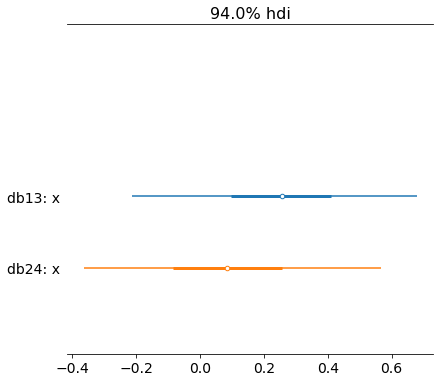

In [ ]:
db13 = idata_11_5.posterior["b"].sel(b_dim_0=0) - idata_11_5.posterior["b"].sel(b_dim_0=2)
db24 = idata_11_5.posterior["b"].sel(b_dim_0=1) - idata_11_5.posterior["b"].sel(b_dim_0=3)
az.plot_forest([db13.values, db24.values], model_names=["db13", "db24"], combined=True);

## 2. UCB admissions

In [ ]:
d = pd.read_csv("./data/UCBadmit.csv", sep=";")
d.shape

(12, 5)

In [ ]:
d

,dept,applicant.gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191
10,E,female,94,299,393


In [ ]:
gidx = (d["applicant.gender"] == "female")logistic.astype(int).values

In [ ]:
with pm.Model() as adm:
    a = pm.Normal("a", 0, 1.5, shape=2)
    p = pm.Deterministic("p", pm.math.invlogit(a[gidx]))
    
    admit = pm.Binomial("admin", p=p, n=d.applications, 
                        observed=d.admit)
    
    trace_adm = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
az.summary(trace_adm, var_names=["a"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],-0.220,0.038,-0.292,-0.151,0.001,0.000,3176.0,3112.0,3176.0,3010.0,1.0
a[1],-0.831,0.051,-0.932,-0.741,0.001,0.001,3063.0,3007.0,3072.0,2815.0,1.0


In [ ]:
diff_a = trace_adm["a"][:, 0] - trace_adm["a"][:, 1]
diff_p = trace_adm["p"][:, 0] - trace_adm["p"][:, 1]
diff_p2 = logistic(trace_adm["a"][:, 0]) - logistic(trace_adm["a"][:, 1])
az.summary({"diff_a": diff_a, "diff_p": diff_p, 
            "diff_p2": diff_p2}, kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
diff_a,0.61,0.06,0.49,0.72
diff_p,0.14,0.01,0.12,0.17
diff_p2,0.14,0.01,0.12,0.17


In [ ]:
didx = pd.Categorical(d["dept"]).codes
with pm.Model() as adm2:
    a = pm.Normal("a", 0, 1.5, shape=2)
    b = pm.Normal("b", 0, 1.5, shape=d.dept.nunique())
    p = pm.Deterministic("p", pm.math.invlogit(a[gidx] + b[didx]))
    
    admit = pm.Binomial("admit", p=p, n=d.applications, 
                        observed=d.admit)
    
    trace_adm2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
az.summary(trace_adm2, 
           var_names=["a", "b"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],-0.516,0.523,-1.525,0.435,0.028,0.020,361.0,339.0,359.0,398.0,1.01
a[1],-0.420,0.523,-1.420,0.540,0.027,0.020,367.0,343.0,367.0,419.0,1.01
b[0],1.097,0.526,0.145,2.111,0.028,0.020,362.0,343.0,362.0,407.0,1.01
b[1],1.050,0.527,0.110,2.089,0.027,0.020,368.0,351.0,368.0,430.0,1.01
b[2],-0.163,0.525,-1.114,0.849,0.027,0.019,367.0,367.0,366.0,416.0,1.01
b[3],-0.194,0.525,-1.212,0.770,0.028,0.020,360.0,360.0,360.0,436.0,1.01
b[4],-0.638,0.525,-1.570,0.396,0.027,0.019,374.0,374.0,374.0,443.0,1.01
b[5],-2.195,0.536,-3.171,-1.167,0.028,0.019,380.0,380.0,381.0,490.0,1.01


In [ ]:
diff_a = trace_adm2["a"][:, 0] - trace_adm2["a"][:, 1]
diff_p = logistic(trace_adm2["a"][:, 0]) - logistic(trace_adm2["a"][:, 1])
az.summary({"diff_a": diff_a, "diff_p": diff_p}, 
           kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
diff_a,-0.10,0.08,-0.25,0.06
diff_p,-0.02,0.02,-0.06,0.01
